In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers.advanced_activations import PReLU
from keras.layers import concatenate
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten, Conv1D,MaxPooling1D,BatchNormalization,Dropout,GlobalAveragePooling1D,PReLU,Input, Embedding, LSTM,concatenate
from keras.optimizers import RMSprop,SGD,Adam,Adamax,Nadam
from keras.layers.advanced_activations import PReLU
import keras
from keras.utils import plot_model
from keras.models import Model
import keras.backend as K
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from sklearn.metrics import r2_score,mean_squared_error
from keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.layers import Dense, Activation,Flatten, Conv1D,MaxPooling1D,BatchNormalization,Dropout,GlobalAveragePooling1D,PReLU,Input, Embedding, LSTM,concatenate
from keras.optimizers import RMSprop,SGD,Adam,Adamax,Nadam
from keras.layers.advanced_activations import PReLU
from keras.activations import relu
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
from keras.models import load_model

# 先导入

In [3]:
SG_model = load_model('D://三维磁场模型//模型完善//single_model_at_present//K=1_final.h5') 

## 读取数据

In [4]:
# df_=pd.read_csv('result.txt',sep='\t',header=1)
# df = df_#制表符分隔
# target_data1=df['theta(deg)'] 
# target_data2=df['phi(deg)'] #提取两列数据
# target_data3=df['R0(m)']

# target_data0=[target_data1,target_data2,target_data3]  
# target_data=pd.concat(target_data0,axis=1)#列合并数据
# feature=df[['B1(T)','B2(T)','B3(T)','B4(T)']] #提取剩余数据                     #获取特征数据
# feature.head()

In [5]:
df_=pd.read_csv('result.txt',sep='\t',header=1)
df_1=df_[['theta(deg)','phi(deg)','R0(m)','B1(T)','B2(T)','B3(T)','B4(T)']] 
df__=pd.read_csv('testset27000-2.txt',sep='\t',header=1)
df_2=df__[['theta(deg)','phi(deg)','R0(m)','B1(T)','B2(T)','B3(T)','B4(T)']] 
df___=pd.concat([df_1,df_2],axis=0)

df = df___
target_data1=df['theta(deg)'] 
target_data2=df['phi(deg)'] #提取两列数据
target_data3=df['R0(m)']

target_data0=target_data1,target_data2,target_data3  
target_data=pd.concat(target_data0,axis=1)                     #列合并数据（目标数据）
feature=df[['B1(T)','B2(T)','B3(T)','B4(T)']]                  #获取特征数据（包括数据集和验证集)

In [6]:
#df = pd.read_csv('test_dataset.txt',sep='\t')#制表符分隔
#target_data1=df['alpha1 (deg)']  #提取两列数据
#target_data2=df['M (mm)']

#target_data0=[target_data1,target_data2]  
#target_data=pd.concat(target_data0,axis=1)#列合并数据
#feature=df[df = pd.read_csv('磁通密度模 (T), B1','磁通密度模 (T), B2','磁通密度模 (T), B3','磁通密度模 (T), B4']] #提取剩余数据                     #获取特征数据
#feature.head()

## 数据标准化再输入模型

In [7]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0,1))
ss_T = MinMaxScaler(feature_range=(0,1))
ss_P = MinMaxScaler(feature_range=(0,1))
ss_R= MinMaxScaler(feature_range=(0,1))
final_feature = mm.fit_transform(feature)                #归一化后的特征数据（最后反变换）

alpha1=ss_T.fit_transform(target_data['theta(deg)'].values.reshape(-1,1))
alpha2=ss_P.fit_transform(target_data['phi(deg)'].values.reshape(-1,1))
M=ss_R.fit_transform(target_data['R0(m)'].values.reshape(-1,1))
final_target = np.concatenate([alpha1,alpha2,M],axis=1) #归一化后的目标数据（最后反变换）(包括数据集和验证集)
final_target = mm.fit_transform(final_target)

final_feature_c=final_feature[0:9315,:]     #数据集feature
final_feature_d=final_feature[9315:16315,:]   #验证集feature
final_target_c=final_target[0:9315,:]           #数据集target
final_target_d=final_target[9315:16315,:]        #验证集target

In [8]:
# from sklearn.preprocessing import MinMaxScaler
# mm = MinMaxScaler(feature_range=(0,1))
# final_feature = mm.fit_transform(feature)    #归一化后的数据（最后反变换）

In [9]:
# final_feature

# 用训练好的模型获取结果

In [10]:
target_p=SG_model.predict(final_feature)

In [11]:
target1_p,target2_p,target3_p=target_p      #target_p输出错误
target1_p.shape[0]

16315

In [12]:
#final_target = mm.fit_transform(target_data)#重置一下标准化运算，这里本来不需要的，前面有点失误

In [13]:
pred_target=np.concatenate((target3_p,target2_p,target1_p),axis=1)
pred_target

array([[-0.00914466,  0.05143895,  0.71751845],
       [-0.00951916,  0.05589405,  0.7082601 ],
       [-0.00947633,  0.06672697,  0.6711252 ],
       ...,
       [ 0.48884138,  0.2407717 ,  0.04537271],
       [ 0.78723574,  0.23033758,  0.45027998],
       [ 0.22275883,  0.8268541 ,  0.85508716]], dtype=float32)

In [14]:
#target_pred=mm.inverse_transform(pred_target) 
target1_pred=ss_T.inverse_transform(target1_p)
target2_pred=ss_P.inverse_transform(target2_p)
target3_pred=ss_R.inverse_transform(target3_p)
target1_pred

array([[16.498775 ],
       [16.285887 ],
       [15.431998 ],
       ...,
       [ 1.0433099],
       [10.353836 ],
       [19.66206  ]], dtype=float32)

In [15]:
target_pred=target1_pred,target2_pred,target3_pred
target_pred=np.concatenate(target_pred,axis=1)

In [16]:
df_result = pd.DataFrame({'模型预测theta':target_pred[:,0],'模型预测phi':target_pred[:,1],'模型预测R0':target_pred[:,2],'theta (deg)':target_data.values[:,0],'phi (deg)':target_data.values[:,1],'R0 (mm)':target_data.values[:,2],'B1(T)':df['B1(T)'].values,'B2(T)':df['B2(T)'].values,'B3(T)':df['B3(T)'].values,'B4(T)':df['B4(T)'].values})

In [17]:
df_result.to_csv('single_model_at_present//k='+str(1)+'_sim-result.txt',sep='\t',index=None)

In [18]:
#df_result

In [19]:
# df_result=pd.read_csv('D://三维磁场-10000//single_model_at_present//K=10_validation.txt',sep='\t',header=0)
# df_result.head()

# 上面即解除标准化后的数据，接下来是数据展示

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


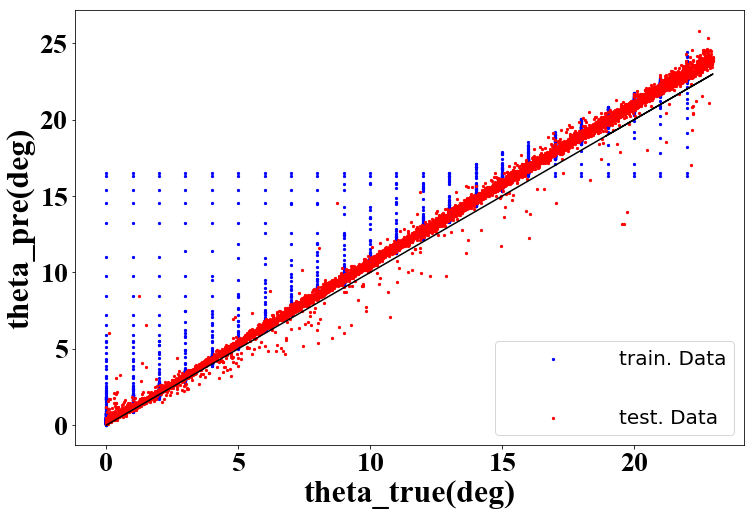

In [21]:
##训练集和数据集结果分开
df_result_0=df_result.values[0:16315,:]
df_result_train=df_result_0[0:9315,:]     #数据集result
df_result_test=df_result_0[9315:16315,:]   #验证集result
df_result_train
plt.figure(figsize=(12,8))
plt.scatter(df_result_train[:,3],df_result_train[:,0],s=5,c='blue',label='train. Data')
plt.scatter(df_result_test[:,3],df_result_test[:,0],s=5,c='red',label='test. Data')
plt.plot(df_result['theta (deg)'].values,df_result['theta (deg)'].values,c='k')
# plt.scatter(df_result['ThetaH'].values,df_result['ThetaH_pred'].values,s=25,c='b',label='Exp. Data')
# plt.plot(df_result['ThetaH'].values,df_result['ThetaH'].values,c='r')

plt.xlabel('theta_true(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('theta_pre(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

##sim-result 的数据与训练相差较大！！
#预测数据差距很大？？？

# 对于偏心角的预测(theta)

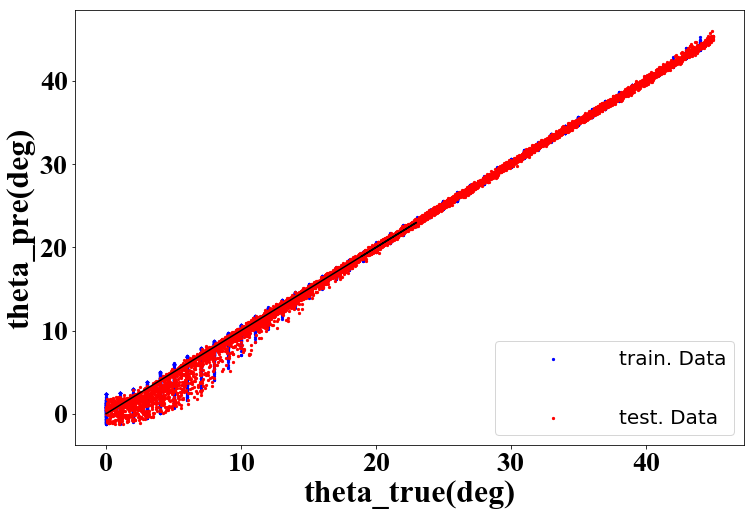

In [22]:
plt.figure(figsize=(12,8))
#plt.scatter(df_result['theta (deg)'].values,df_result['模型预测theta'].values,s=15,c='grey',label='Exp. Data')
plt.scatter(df_result_train[:,4],df_result_train[:,1],s=5,c='blue',label='train. Data')
plt.scatter(df_result_test[:,4],df_result_test[:,1],s=5,c='red',label='test. Data')
plt.plot(df_result['theta (deg)'].values,df_result['theta (deg)'].values,c='k')
# plt.scatter(df_result['ThetaH'].values,df_result['ThetaH_pred'].values,s=25,c='b',label='Exp. Data')
# plt.plot(df_result['ThetaH'].values,df_result['ThetaH'].values,c='r')

plt.xlabel('theta_true(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('theta_pre(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

##sim-result 的数据与训练相差较大！！
#预测数据差距很大？？？

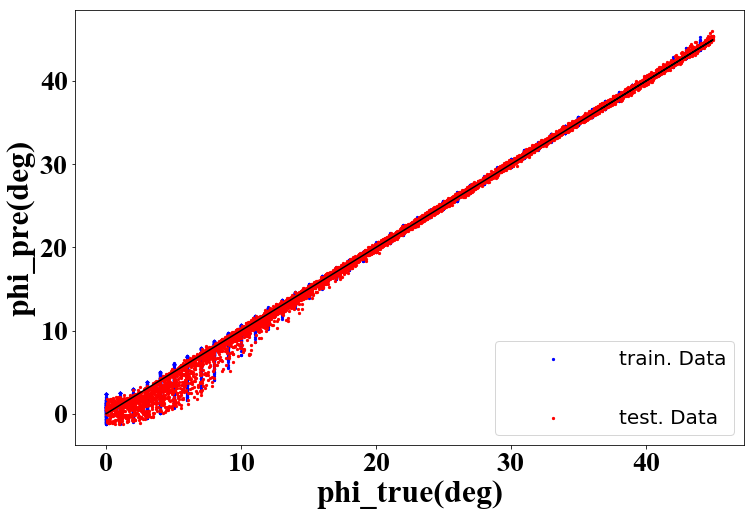

In [23]:
plt.figure(figsize=(12,8))
#plt.scatter(df_result['phi (deg)'].values,df_result['模型预测phi'].values,s=15,c='grey',label='Exp. Data')
#plt.plot(df_result['phi (deg)'].values,df_result['phi (deg)'].values,c='k')
# plt.scatter(df_result['phi'].values,df_result['phi_pred'].values,s=25,c='b',label='Exp. Data')
# plt.plot(df_result['phi'].values,df_result['phi'].values,c='r')
plt.scatter(df_result_train[:,4],df_result_train[:,1],s=5,c='blue',label='train. Data')
plt.scatter(df_result_test[:,4],df_result_test[:,1],s=5,c='red',label='test. Data')
plt.plot(df_result['phi (deg)'].values,df_result['phi (deg)'].values,c='k')
plt.xlabel('phi_true(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('phi_pre(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

# 对于偏心距离的预测

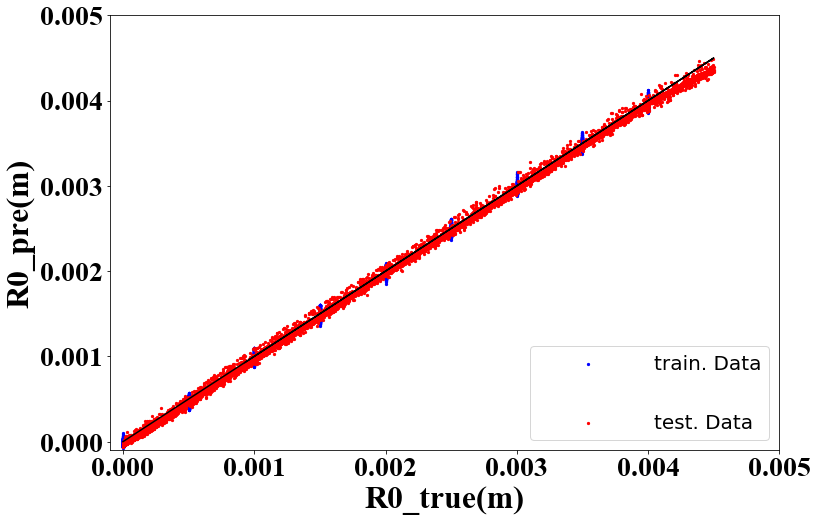

In [32]:
plt.figure(figsize=(12,8))
#plt.scatter(df_result['R0 (mm)'].values,df_result['模型预测R0'].values,s=25,c='grey',label='Exp. Data')
#plt.plot(df_result['R0 (mm)'].values,df_result['R0 (mm)'].values,c='k')
plt.scatter(df_result_train[:,5],df_result_train[:,2],s=5,c='blue',label='train. Data')
plt.scatter(df_result_test[:,5],df_result_test[:,2],s=5,c='red',label='test. Data')
plt.plot(df_result['R0 (mm)'].values,df_result['R0 (mm)'].values,c='k')
# plt.scatter(df_result['R'].values,df_result['R_pred'].values,s=25,c='b',label='Exp. Data')
# plt.plot(df_result['R'].values,df_result['R'].values,c='r')
plt.xlim(-0.0001,0.005)
plt.ylim(-0.0001,0.005)
plt.xlabel('R0_true(m)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('R0_pre(m)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

## 可以看出，模型对偏心距离的预测极其准确。。对偏心角要差一点

# 请根据得到的角度和数值，反推电流值并画图！

In [28]:
#电流计算
R=0.05
mu_0=4*np.pi*pow(10,-7)

df_=pd.read_csv('result.txt',sep='\t',header=1)
df__=pd.read_csv('testset27000-2.txt',sep='\t',header=1)    #数据集和验证集拼接
df___=pd.concat([df_,df__],axis=0)
df0=df___

B1=df_result['B1(T)']
B2=df_result['B2(T)']
B3=df_result['B3(T)']
B4=df_result['B4(T)']

# B1=df0['B1(T)']
# B2=df0['B2(T)']
# B3=df0['B3(T)']
# B4=df0['B4(T)']

# theta=df0['theta(deg)'] 
# phi=df0['phi(deg)'] 
# R0=df0['R0(m)']

theta=df_result['模型预测theta'] 
phi=df_result['模型预测phi'] 
R0=df_result['模型预测R0']
theta=theta*np.pi/180
phi=phi*np.pi/180

##根据模型反解电流(B2和B3应该交换位置)
I1=np.pi*2*np.sqrt(np.square(R0+R*np.cos(theta))+np.square(R*np.cos(phi)*np.sin(theta)))*np.sqrt(np.square(R0+R*np.cos(theta))+np.square(R*np.sin(theta)))*B1/(mu_0*(R+R0*np.cos(theta))*np.cos(phi))
I2=np.pi*2*np.sqrt(np.square(R0-R*np.sin(theta))+np.square(R*np.cos(phi)*np.cos(theta)))*np.sqrt(np.square(R0-R*np.sin(theta))+np.square(R*np.cos(theta)))*B3/(mu_0*(R-R0*np.sin(theta))*np.cos(phi))
I3=np.pi*2*np.sqrt(np.square(R0+R*np.sin(theta))+np.square(R*np.cos(phi)*np.cos(theta)))*np.sqrt(np.square(R0+R*np.sin(theta))+np.square(R*np.cos(theta)))*B2/(mu_0*(R+R0*np.sin(theta))*np.cos(phi))
I4=np.pi*2*np.sqrt(np.square(R0-R*np.cos(theta))+np.square(R*np.cos(phi)*np.sin(theta)))*np.sqrt(np.square(R0-R*np.cos(theta))+np.square(R*np.sin(theta)))*B4/(mu_0*(R-R0*np.cos(theta))*np.cos(phi))

I=(I1+I2+I3+I4)/8
I1=I1/2
I2=I2/2
I3=I3/2
I4=I4/2

##传统方法求电流
I11=2*np.pi*R*B1/mu_0/2
I22=2*np.pi*R*B3/mu_0/2
I33=2*np.pi*R*B2/mu_0/2
I44=2*np.pi*R*B4/mu_0/2
I0=(I11+I22+I33+I44)/4

theta=theta*180/np.pi
phi=phi*180/np.pi
I_error=abs(I0-500)*100/500
error_avg=sum(I_error)/len(I_error)
error_avg
max(I_error)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


16.46828127131935

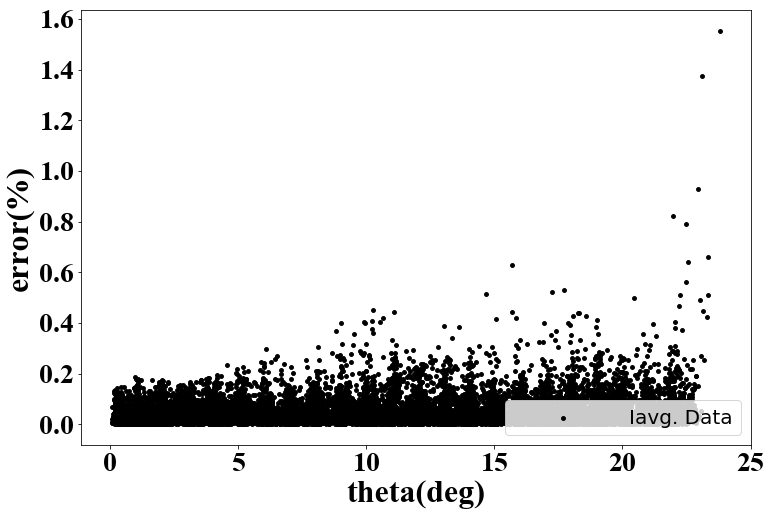

In [37]:
##画电流变化图——theta(Iavg和Itrad)
##plt.scatter(x,y,s=25,c='b',marker='o',label='Exp.Data')   s=25是点的大小;marker是散点的形状，默认为'o'圆圈
I0_error=abs(I-500)*100/500
plt.figure(figsize=(12,8))
#plt.scatter(theta.values,I.values,s=25,c='b',label='I. Data')
plt.scatter(theta.values,I0_error.values,s=15,c='k',label='Iavg. Data')
# plt.scatter(phi.values,I3.values,s=25,c='g',label='I3. Data')
# plt.scatter(phi.values,I4.values,s=25,c='k',label='I4. Data')
#plt.xlim(0,0.005)
#plt.ylim(0,0.005)
plt.xlabel('theta(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('error(%)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

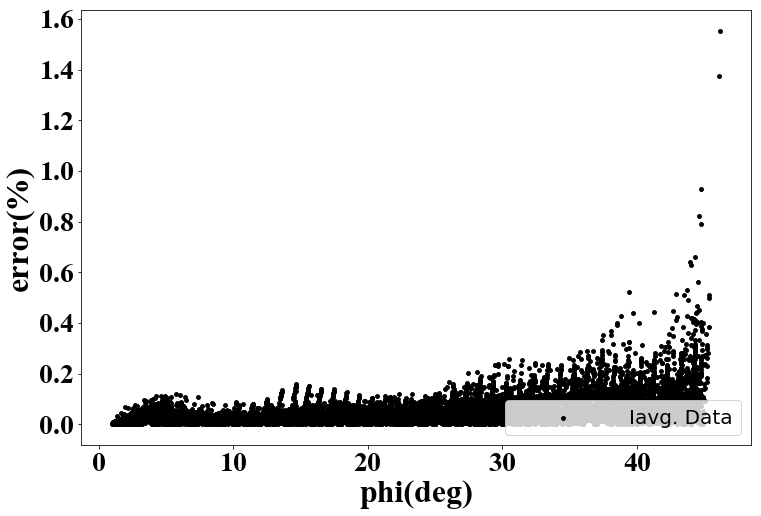

In [39]:
##画电流变化图——phi(Iavg和Itrad)
##plt.scatter(x,y,s=25,c='b',marker='o',label='Exp.Data')   s=25是点的大小;marker是散点的形状，默认为'o'圆圈
I0_error=abs(I-500)*100/500
plt.figure(figsize=(12,8))
#plt.scatter(theta.values,I.values,s=25,c='b',label='I. Data')
plt.scatter(phi.values,I0_error.values,s=15,c='k',label='Iavg. Data')
# plt.scatter(phi.values,I3.values,s=25,c='g',label='I3. Data')
# plt.scatter(phi.values,I4.values,s=25,c='k',label='I4. Data')
#plt.xlim(0,0.005)
#plt.ylim(0,0.005)
plt.xlabel('phi(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('error(%)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

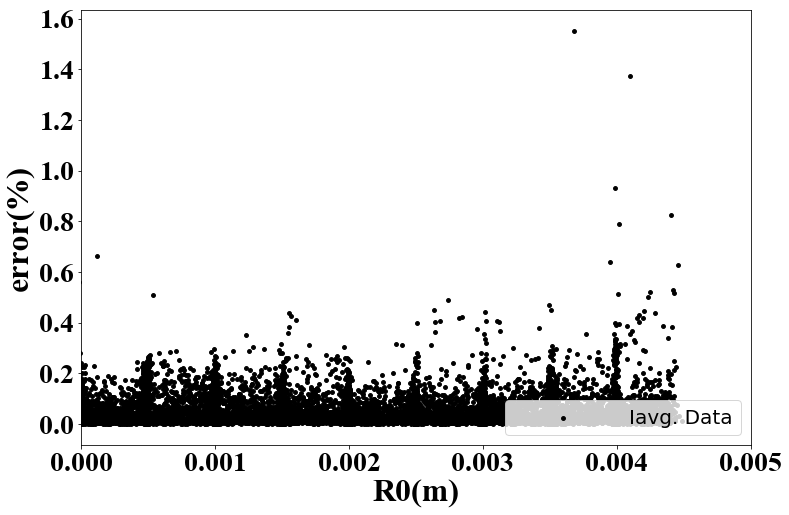

In [41]:
##画电流变化图——R0(Iavg和Itrad)
##plt.scatter(x,y,s=25,c='b',marker='o',label='Exp.Data')   s=25是点的大小;marker是散点的形状，默认为'o'圆圈
I0_error=abs(I-500)*100/500
plt.figure(figsize=(12,8))
#plt.scatter(theta.values,I.values,s=25,c='b',label='I. Data')
plt.scatter(R0.values,I0_error.values,s=15,c='k',label='Iavg. Data')
# plt.scatter(phi.values,I3.values,s=25,c='g',label='I3. Data')
# plt.scatter(phi.values,I4.values,s=25,c='k',label='I4. Data')
plt.xlim(0,0.005)
#plt.ylim(0,0.005)
plt.xlabel('R0(m)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('error(%)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

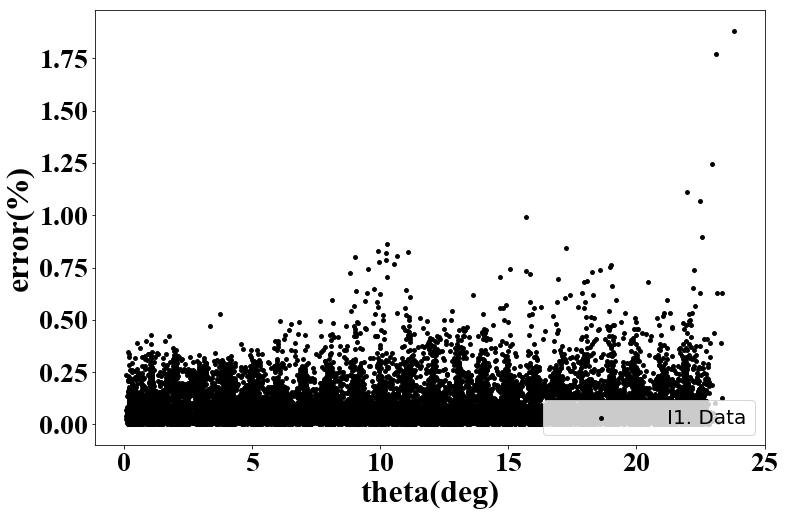

In [45]:
##画电流变化图theta——I1、I2、I3、I4
##plt.scatter(x,y,s=25,c='b',marker='o',label='Exp.Data')   s=25是点的大小;marker是散点的形状，默认为'o'圆圈
plt.figure(figsize=(12,8))
I0_error=abs(I1-500)*100/500
plt.scatter(theta.values,I0_error.values,s=15,c='k',label='I1. Data')
# plt.scatter(phi.values,I2.values,s=25,c='r',label='I2. Data')
# plt.scatter(phi.values,I3.values,s=25,c='g',label='I3. Data')
# plt.scatter(phi.values,I4.values,s=25,c='k',label='I4. Data')
#plt.xlim(-0.0001,0.005)
#plt.ylim(-0.0001,0.010)
plt.xlabel('theta(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('error(%)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

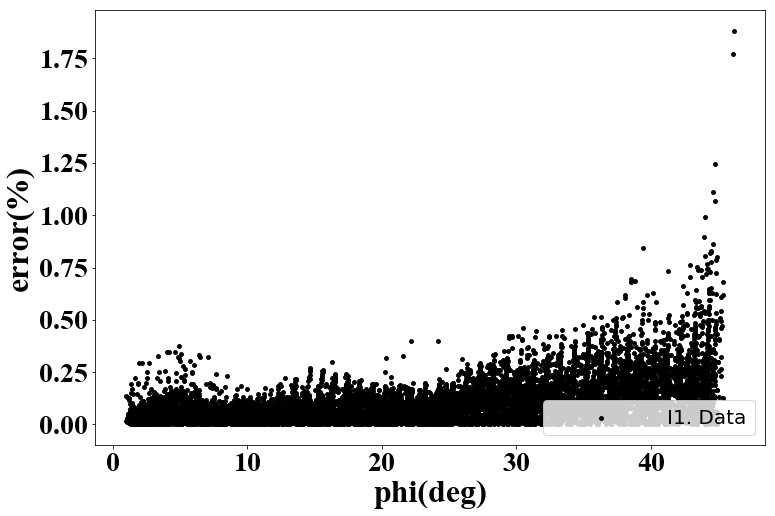

In [49]:
##画电流变化图phi——I1、I2、I3、I4
##plt.scatter(x,y,s=25,c='b',marker='o',label='Exp.Data')   s=25是点的大小;marker是散点的形状，默认为'o'圆圈
plt.figure(figsize=(12,8))
I0_error=abs(I1-500)*100/500
plt.scatter(phi.values,I0_error.values,s=15,c='k',label='I1. Data')
# plt.scatter(phi.values,I2.values,s=25,c='r',label='I2. Data')
# plt.scatter(phi.values,I3.values,s=25,c='g',label='I3. Data')
# plt.scatter(phi.values,I4.values,s=25,c='k',label='I4. Data')
#plt.xlim(-0.0001,0.005)
#plt.ylim(-0.0001,0.010)
plt.xlabel('phi(deg)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('error(%)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

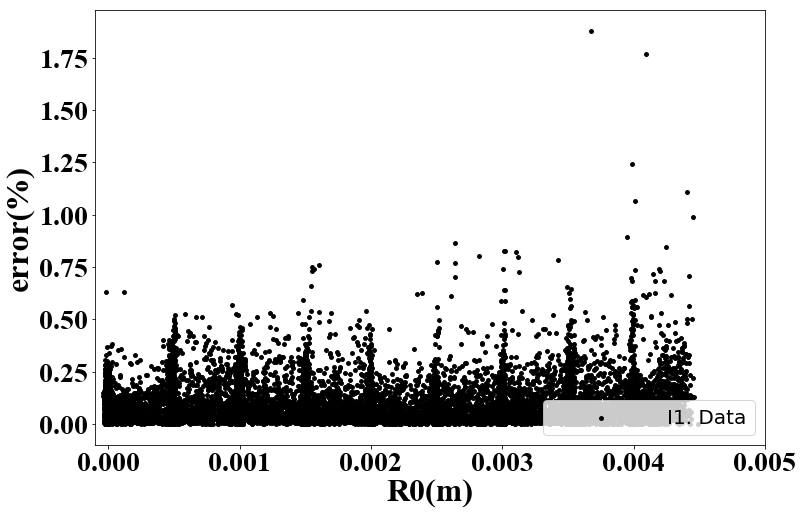

In [53]:
##画电流变化图R0——I1、I2、I3、I4
##plt.scatter(x,y,s=25,c='b',marker='o',label='Exp.Data')   s=25是点的大小;marker是散点的形状，默认为'o'圆圈
plt.figure(figsize=(12,8))
I0_error=abs(I1-500)*100/500
plt.scatter(R0.values,I0_error.values,s=15,c='k',label='I1. Data')
# plt.scatter(phi.values,I2.values,s=25,c='r',label='I2. Data')
# plt.scatter(phi.values,I3.values,s=25,c='g',label='I3. Data')
# plt.scatter(phi.values,I4.values,s=25,c='k',label='I4. Data')
plt.xlim(-0.0001,0.005)
#plt.ylim(-0.0001,0.010)
plt.xlabel('R0(m)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('error(%)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

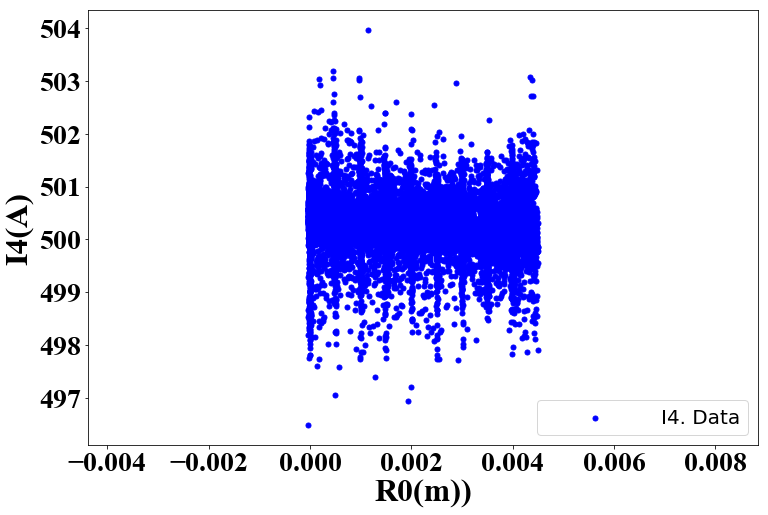

In [86]:
##画电流变化图I4
##plt.scatter(x,y,s=25,c='b',marker='o',label='Exp.Data')   s=25是点的大小;marker是散点的形状，默认为'o'圆圈
plt.figure(figsize=(12,8))
plt.scatter(R0.values,I4.values,s=25,c='b',label='I4. Data')
# plt.scatter(phi.values,I2.values,s=25,c='r',label='I2. Data')
# plt.scatter(phi.values,I3.values,s=25,c='g',label='I3. Data')
# plt.scatter(phi.values,I4.values,s=25,c='k',label='I4. Data')
plt.xlabel('R0(m))',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('I4(A)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

In [44]:
#计算电流
# import math
R=0.05
mu_0=4*np.pi*pow(10,-7)
df0 = pd.read_csv('test_dataset.txt',sep='\t')
B1=df0['磁通密度模 (T), B1']
B2=df0['磁通密度模 (T), B2']
B3=df0['磁通密度模 (T), B3']
B4=df0['磁通密度模 (T), B4']
alpha1=df0['alpha1 (deg)']*np.pi/180  #提取两列数据
M=df0['M (mm)']/1000
# b=np.cos(alpha1)
# b.head()
I1=np.pi*2*np.sqrt(R*R+M*M-2*R*M*np.cos(alpha1))*B1/mu_0
I1.head()
alpha2=alpha1+90*np.pi/180
I2=np.pi*2*np.sqrt(R*R+M*M-2*R*M*np.cos(alpha2))*B2/mu_0
I2.head()
alpha3=(180*np.pi/180)-alpha1
I3=np.pi*2*np.sqrt(R*R+M*M-2*R*M*np.cos(alpha3))*B3/mu_0
I3.head()
alpha4=90*np.pi/180-alpha1
I4=np.pi*2*np.sqrt(R*R+M*M-2*R*M*np.cos(alpha4))*B4/mu_0
I4.head()
I=(I1+I2+I3+I4)/4
I.head()     ###注意：此处用的Alpha和M都是未拟合之前的数据（后续采用预测值），磁感应强度也是未经变换的值

0    505.682603
1    505.599075
2    505.537554
3    505.459367
4    505.381606
dtype: float64

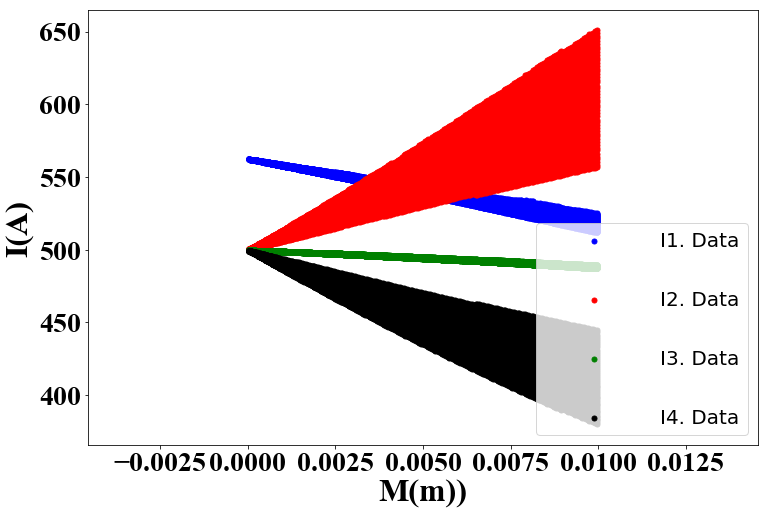

In [59]:
##画电流变化图
##plt.scatter(x,y,s=25,c='b',marker='o',label='Exp.Data')   s=25是点的大小;marker是散点的形状，默认为'o'圆圈
plt.figure(figsize=(12,8))
plt.scatter(M.values,I1.values,s=25,c='b',label='I1. Data')
plt.scatter(M.values,I2.values,s=25,c='r',label='I2. Data')
plt.scatter(M.values,I3.values,s=25,c='g',label='I3. Data')
plt.scatter(M.values,I4.values,s=25,c='k',label='I4. Data')
plt.xlabel('M(m))',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('I(A)',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

## 接下来我只展示一些计算历史

In [110]:
df_his1=pd.read_csv('single_model_at_present\\k=1_history_accuracy.txt',sep='\t')

In [112]:
df_his2=pd.read_csv('single_model_at_present\\k=1_history_loss.txt',sep='\t')

In [122]:
times=np.arange(0,df_his1.values.shape[0],1)

In [121]:
df_his1.head()

,theta_accuracy,val_theta_accuracy,R_accuracy,val_R_accuracy
0,0.982880,0.982339,0.549583,0.552812
1,0.998579,0.998518,0.817369,0.814952
2,0.999249,0.999226,0.886211,0.886620
3,0.999226,0.999212,0.914221,0.916881
4,0.999306,0.999301,0.931762,0.935298


# R2随着训练次数的变化

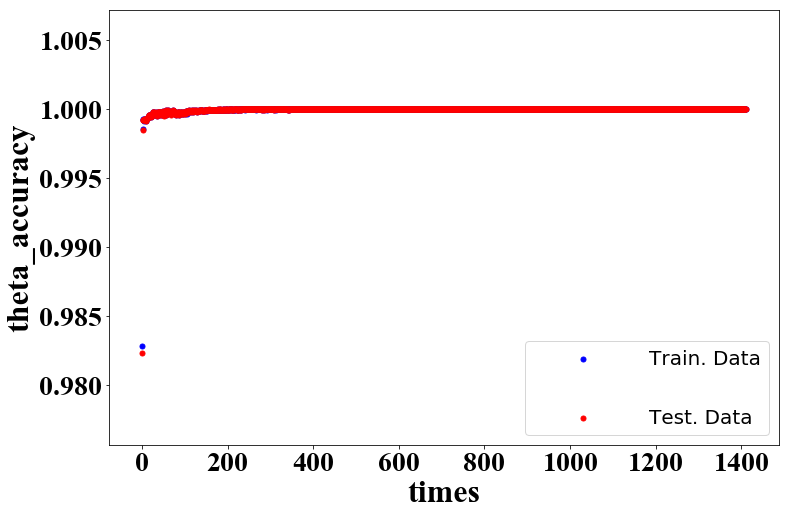

In [123]:
plt.figure(figsize=(12,8))
plt.scatter(times,df_his1['theta_accuracy'].values,s=25,c='b',label='Train. Data')
plt.scatter(times,df_his1['val_theta_accuracy'].values,s=25,c='r',label='Test. Data')


plt.xlabel('times',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('theta_accuracy',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

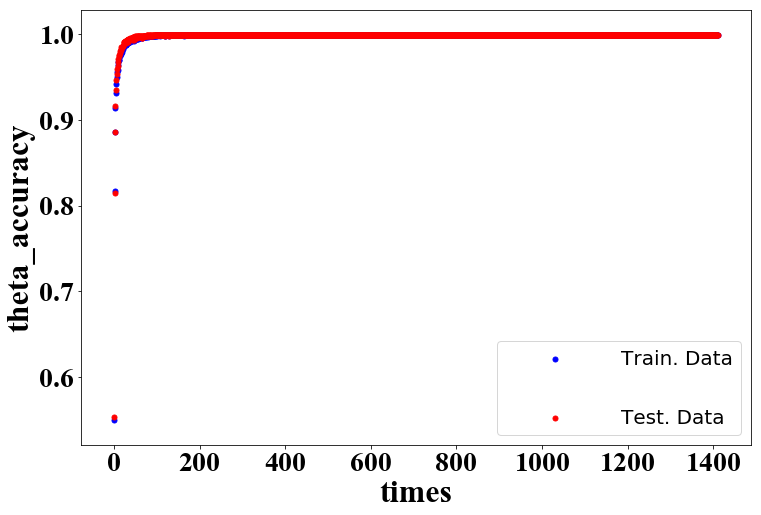

In [124]:
plt.figure(figsize=(12,8))
plt.scatter(times,df_his1['R_accuracy'].values,s=25,c='b',label='Train. Data')
plt.scatter(times,df_his1['val_R_accuracy'].values,s=25,c='r',label='Test. Data')


plt.xlabel('times',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.ylabel('theta_accuracy',fontdict={'family' : 'Times New Roman', 'size'   : 32,'weight':'heavy'})
plt.legend(loc=4,labelspacing=2,handlelength=5,fontsize=20)
plt.xticks(fontproperties = 'Times New Roman', size = 28)
plt.yticks(fontproperties = 'Times New Roman', size = 28)
plt.show()

# loss因为失误删掉了，另外你可以取对数画画看，比较一下